In [1]:
# !pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [3]:
# 불러오기
df = pd.read_csv('Data/preprocessed_movies_data.csv')

In [4]:
# 폰트 설정
plt.rc('font', family='Malgun Gothic')
# plt.rc('font', family='Apple SD Gothic Neo')

### **페르소나**

- **이름**: Alex Kim
- **직업**: 영화 제작사 마케팅 팀장
- **목표**: 시장 트렌드를 분석하여 관객들이 원하는 영화 장르와 특성을 파악하고, 투자 대비 수익성이 높은 영화 제작 아이디어를 도출하고자 함.
- **관심사**:
    - 어떤 영화가 최근 트렌드에 부합하는지?
    - 흥행 성공 요인과 관련된 데이터 패턴 발견
    - 관객들이 선호하는 장르, 러닝타임, 배우 등 구체적인 요소 분석
    - 영화 제작 비용 대비 수익성을 극대화할 수 있는 전략

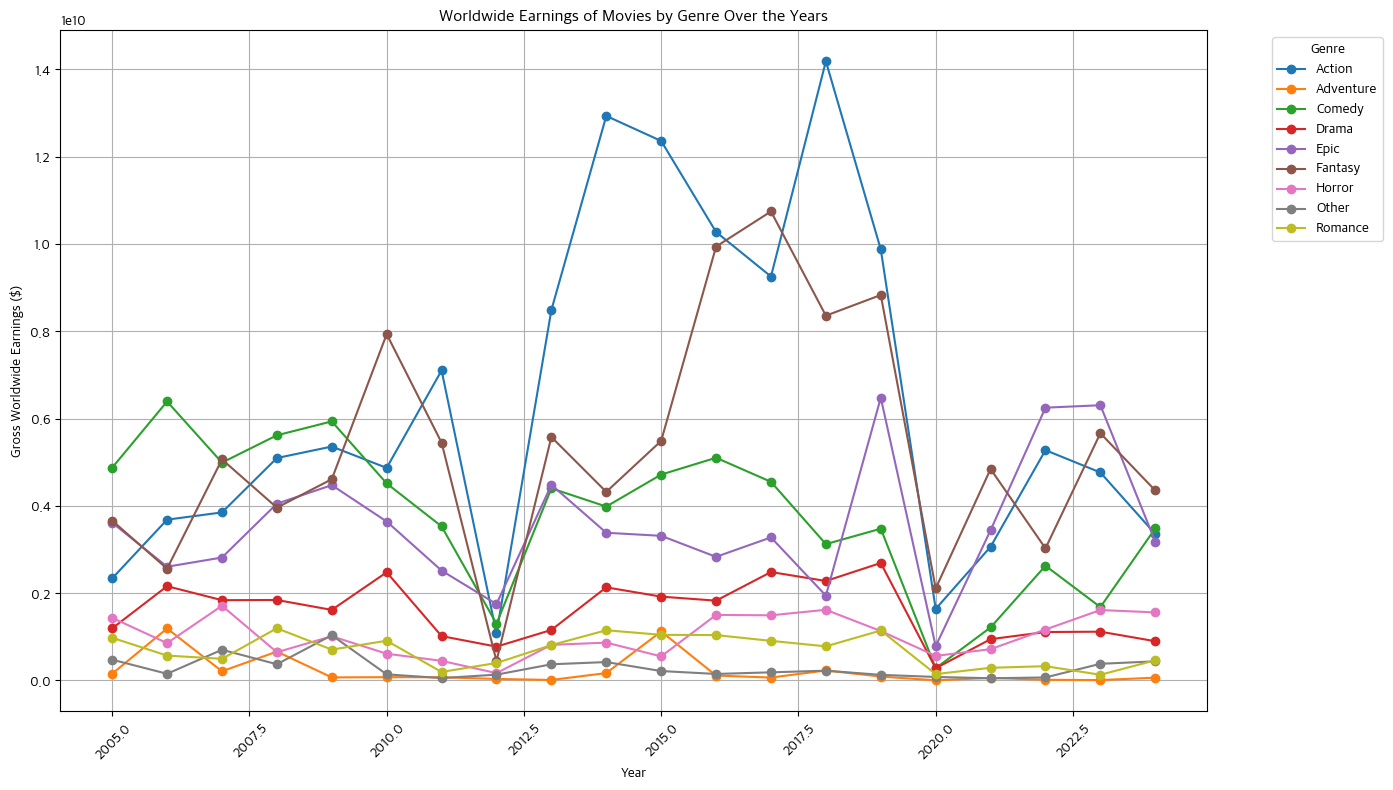

In [5]:
# 3.
genre_earnings = df.groupby(['Year', 'Category'])['grossWorldWide'].sum().reset_index()

# 모든 장르에 대해 시각화
plt.figure(figsize=(14, 8))  # 넓은 형태의 그림 크기 지정

# 각 장르에 대해 연도별 수익을 시각화
for genre in genre_earnings['Category'].unique():
    genre_data = genre_earnings[genre_earnings['Category'] == genre]
    plt.plot(genre_data['Year'], genre_data['grossWorldWide'], marker='o', label=genre)

plt.xlabel('Year')
plt.ylabel('Gross Worldwide Earnings ($)')
plt.title('Worldwide Earnings of Movies by Genre Over the Years')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례를 오른쪽에 배치
plt.grid(True)
plt.xticks(rotation=45)  # 연도 표시가 겹치지 않도록 회전
plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

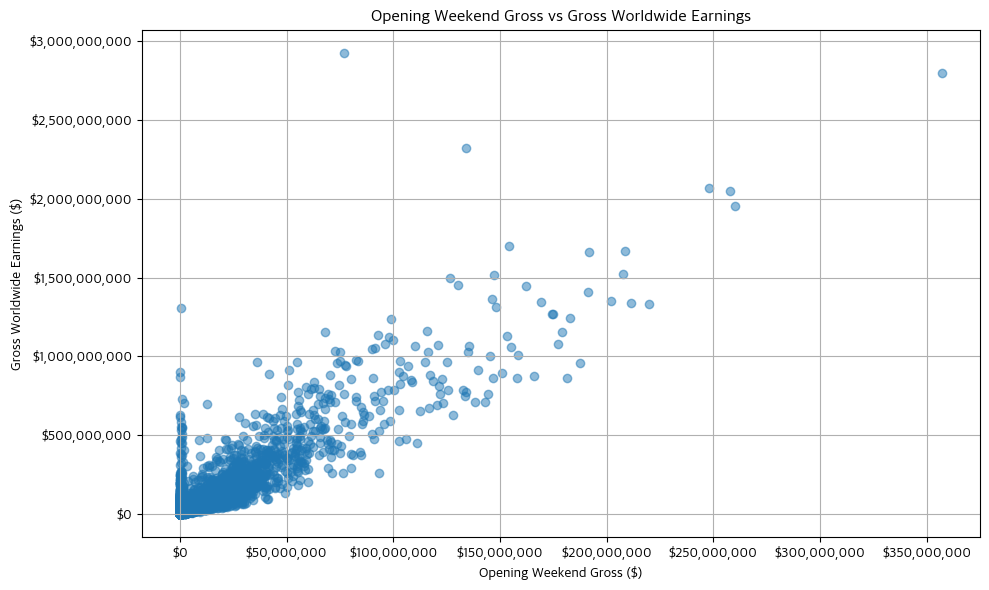

개봉 주 수익(Opening_weekend_Gross)이 전체 흥행(GrossWorldwide) 상관 관계 : 0.90


In [6]:
# 'opening_weekend_Gross'와 'grossWorldWide' 컬럼을 숫자형으로 변환
df['opening_weekend_Gross'] = pd.to_numeric(df['opening_weekend_Gross'], errors='coerce')

# 산점도 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df['opening_weekend_Gross'], df['grossWorldWide'], alpha=0.5)

# 천 단위 구분 및 통화 기호 추가 함수
def currency(x, pos):
    return f"${x:,.0f}"

# X축과 Y축에 천 단위 구분과 통화 기호 적용
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency))
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))

# 축 레이블 및 제목 설정
plt.xlabel('Opening Weekend Gross ($)')
plt.ylabel('Gross Worldwide Earnings ($)')
plt.title('Opening Weekend Gross vs Gross Worldwide Earnings')

plt.grid(True)

# 그래프 출력
plt.tight_layout()
plt.show()

# 'opening_weekend_Gross'와 'grossWorldWide'의 상관 계수 계산
opening_weekend_correlation = df['opening_weekend_Gross'].corr(df['grossWorldWide'])
print(f"개봉 주 수익(Opening_weekend_Gross)이 전체 흥행(GrossWorldwide) 상관 관계 : {opening_weekend_correlation:.2f}")


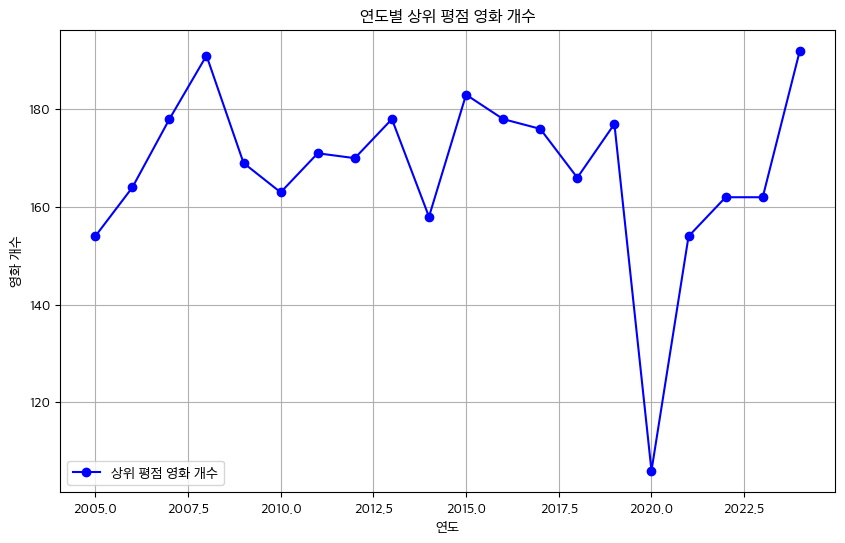

In [7]:
# IMDb 평점이 높은 영화만 필터링 (예: 평점 7.0 이상)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
top_rated_movies = df[df['Rating'] >= 7.0]

# 연도별 상위 평점 영화 개수 계산
top_rated_by_year = top_rated_movies.groupby('Year')['Title'].count()

# 꺾은선 그래프 시각화
plt.figure(figsize=(10, 6))
plt.plot(top_rated_by_year.index, top_rated_by_year.values, marker='o', color='b', label='상위 평점 영화 개수')
plt.xlabel('연도')
plt.ylabel('영화 개수')
plt.title('연도별 상위 평점 영화 개수')
plt.legend()
plt.grid(True)
plt.show()

#### 영화 제작사 스토리 개발 팀장 (Story Development Manager)
**목표**:
- 흥행 가능성이 높은 영화 스토리를 기획하고 개발 방향성을 제시.
- 기존 흥행 데이터를 바탕으로 관객이 선호하는 스토리와 장르를 파악.
- 영화 시나리오의 독창성과 시장성을 균형 있게 고려하여 성공적인 프로젝트를 기획.





1. 장르별 수익성 및 평점 분석 "어떤 장르가 가장 높은 흥행성과와 평점을 기록하는가?"

/var/folders/qv/kf5vm6ln5k113k6v46_6ynn00000gn/T/ipykernel_5647/761748592.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_analysis, x='Category', y='grossWorldWide', palette='viridis')
/var/folders/qv/kf5vm6ln5k113k6v46_6ynn00000gn/T/ipykernel_5647/761748592.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_analysis, x='Category', y='Rating', palette='coolwarm')


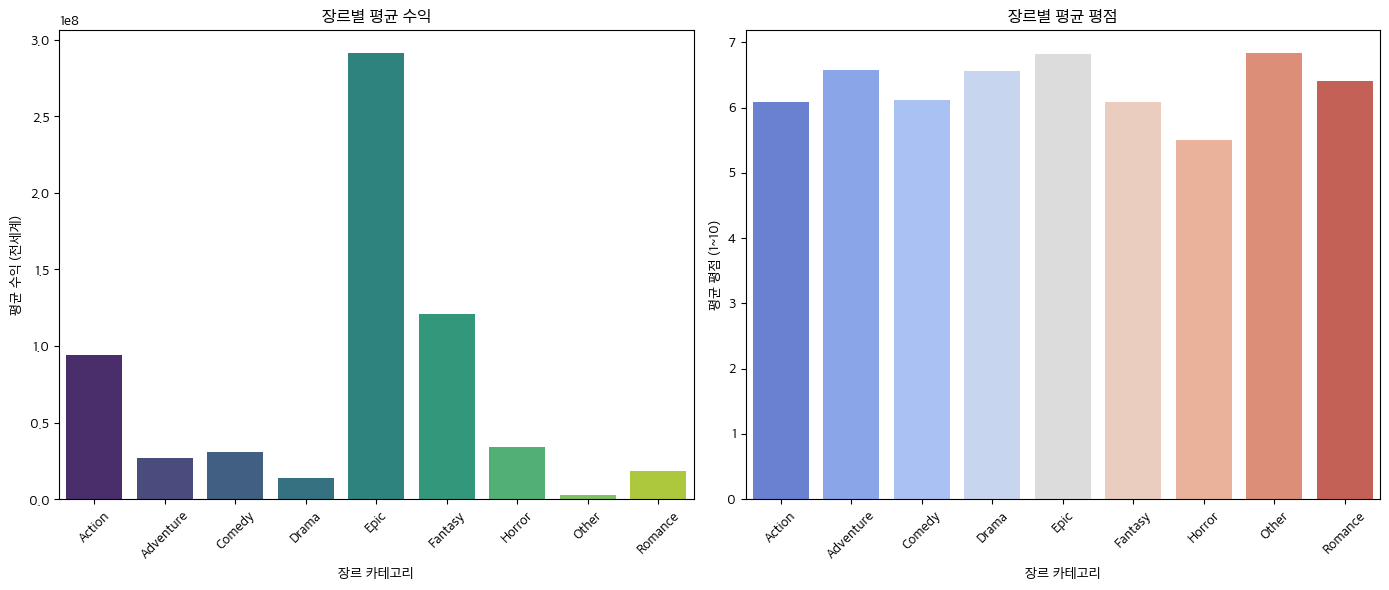

In [8]:
# Category와 grossWorldWide, Rating 데이터 활용
# 장르별 수익과 평점 분석
genre_analysis = df.groupby('Category').agg({
    'grossWorldWide' : 'mean',
    'Rating' : 'mean'
}).reset_index()

# 장르별 평균 수익 막대그래프
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=genre_analysis, x='Category', y='grossWorldWide', palette='viridis')
plt.title('장르별 평균 수익')
plt.xlabel('장르 카테고리') 
plt.ylabel('평균 수익 (전세계)') 
plt.xticks(rotation=45)

# 장르별 평균 평점 막대그래프
plt.subplot(1, 2, 2)
sns.barplot(data=genre_analysis, x='Category', y='Rating', palette='coolwarm')
plt.title('장르별 평균 평점')
plt.xlabel('장르 카테고리') 
plt.ylabel('평균 평점 (1~10)') 
plt.xticks(rotation=45)

# 그래프 출력
plt.tight_layout()
plt.show()

2. 수상 이력과 흥행의 상관관계 분석 "수상 실적이 있는 영화들의 스토리적 특징과 흥행 패턴은?"

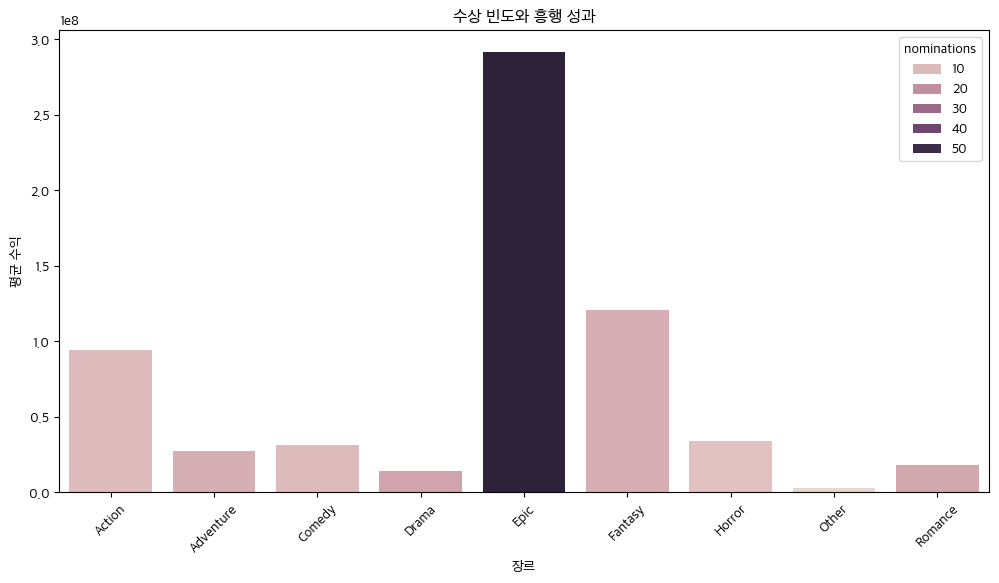

In [9]:

# 수상 여부에 따른 흥행성과 비교
# 장르별 수상 빈도 분석
# 시각화를 통한 수상작의 특징 패턴 도출
# 수상 여부 및 흥행 성과 비교
award_analysis = df.groupby('Category').agg({
    'nominations': 'mean',
    'grossWorldWide': 'mean'
}).reset_index()

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=award_analysis, x='Category', y='grossWorldWide', hue='nominations')
plt.title("수상 빈도와 흥행 성과")
plt.xlabel("장르")
plt.ylabel("평균 수익")
plt.xticks(rotation=45)
plt.show()



3. 평점-투표수 관계를 통한 관객 선호도 분석 "높은 평점과 많은 투표를 받은 영화들의 공통된 특징은?"

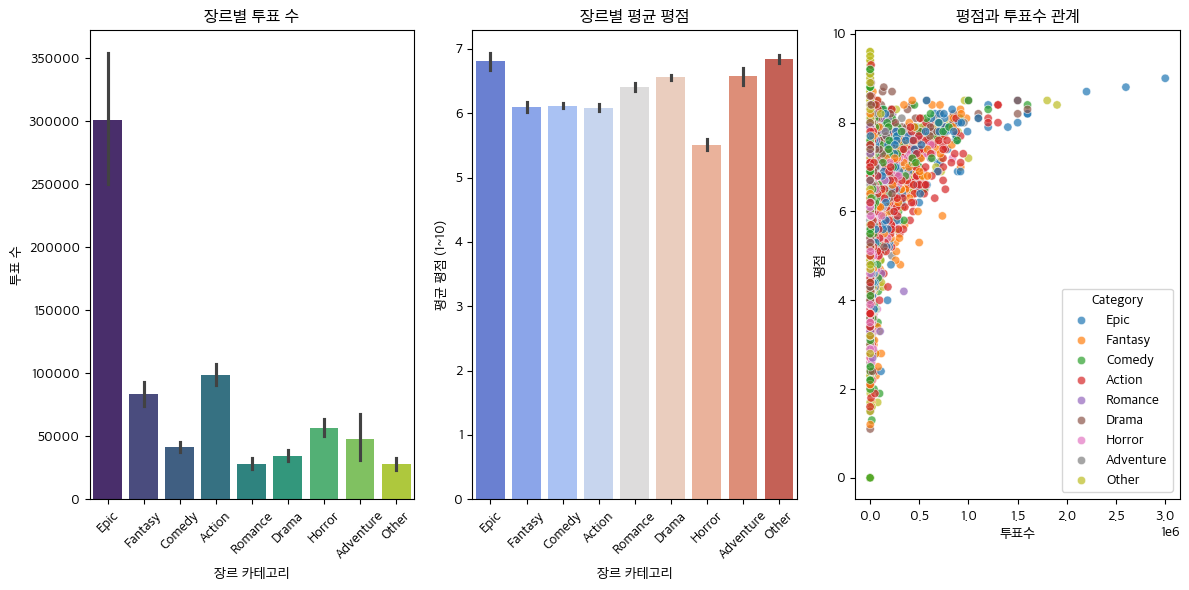

In [10]:
# 평점-투표수 관계 분석
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Votes', y='Rating', hue='Category', alpha=0.7)
plt.title("평점과 투표수 관계")
plt.xlabel("투표수")
plt.ylabel("평점")

# 장르별 투표 수 막대그래프
plt.subplot(1, 3, 1)
sns.barplot(data=df, x='Category', y='Votes', palette='viridis', hue='Category')
plt.title('장르별 투표 수')
plt.xlabel('장르 카테고리') 
plt.ylabel('투표 수') 
plt.xticks(rotation=45)

# 장르별 평균 평점 막대그래프
plt.subplot(1, 3, 2)
sns.barplot(data=df, x='Category', y='Rating', palette='coolwarm', hue='Category')
plt.title('장르별 평균 평점')
plt.xlabel('장르 카테고리') 
plt.ylabel('평균 평점 (1~10)') 
plt.xticks(rotation=45)

# 그래프 출력
plt.tight_layout()
plt.show()


## **페르소나 2: Emily Park**
- **직업**: 영화 제작사 리서치 분석가 (Data Analyst)
- **목표**:
    - 데이터 기반으로 신흥 시장 및 관객 니즈를 파악하여 새로운 영화 프로젝트의 성공 가능성을 높임.
    - 과거 흥행 패턴을 분석해 제작사 내부에서 전략적인 의사결정을 지원.
- **관심사**:
    - 신흥 시장에서의 흥행 가능성이 높은 영화 장르 및 요소 분석
    - 낮은 제작비로 높은 수익을 낼 수 있는 영화 요소 탐구
    - 지역별로 효과적인 배급 및 마케팅 전략 수립
    - 데이터를 활용하여 영화 제작사 내부 보고서 작성 및 시각화

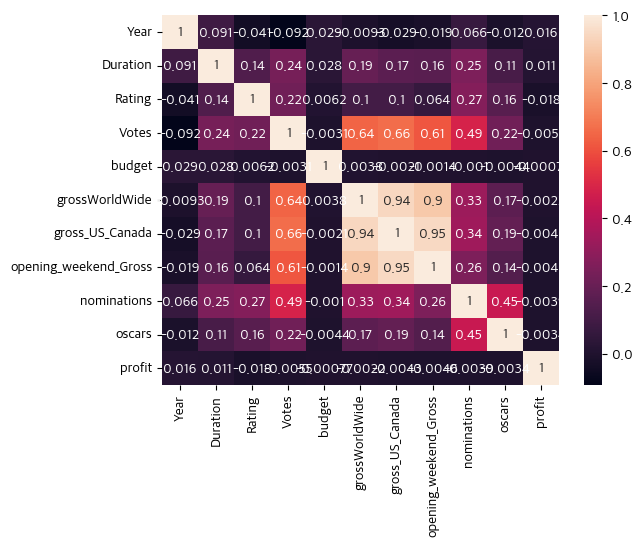

In [11]:
# - 제작비 대비 흥행 성공 가능성이 높은 제작 요소(장르, 감독, 배우)는 무엇인가요?
df['profit'] = df['grossWorldWide'] / df['budget']
corr_matrix = df.corr(numeric_only=True) # 상관계수 행렬
corr_matrix

sns.heatmap(corr_matrix, annot=True)
plt.show()

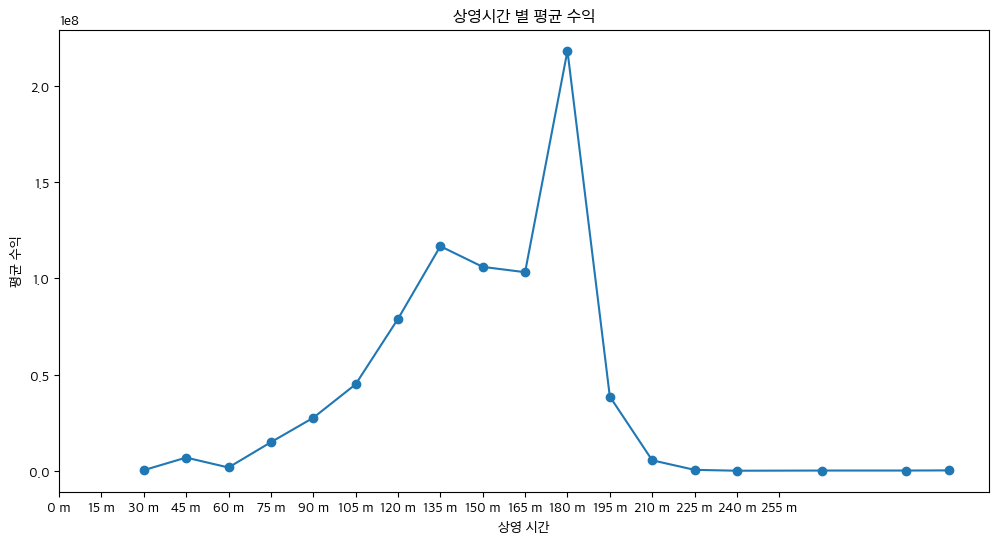

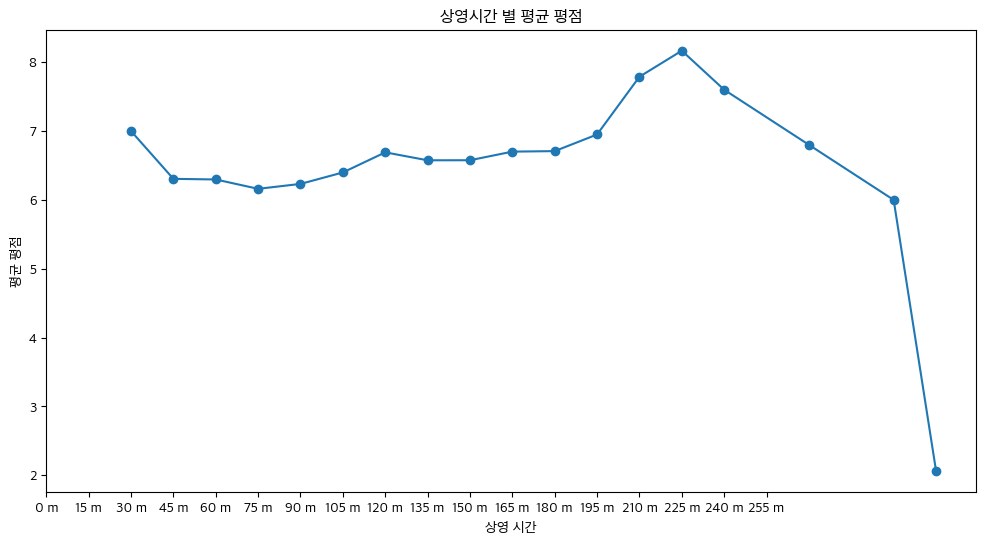

In [12]:
#     - 상영 시간이 수익률에 미치는 영향을 박스플롯으로 시각화
df['runtime'] = (df['Duration'] // 15)

# 상영시간별 평균 수익
df_runtime_gww_mean = df.groupby('runtime')['grossWorldWide'].mean()
plt.figure(figsize=(12, 6))
plt.plot(df_runtime_gww_mean, marker='o')
plt.xlabel('상영 시간')
plt.ylabel('평균 수익')
plt.xticks(ticks=np.arange(0, 18), labels=[f'{i*15} m' for i in range(18)])
plt.title('상영시간 별 평균 수익')
plt.show()

# 상영시간별 평균 평점
df_runtime_rating_mean = df.groupby('runtime')['Rating'].mean()
plt.figure(figsize=(12, 6))
plt.plot(df_runtime_rating_mean, marker='o')
plt.xlabel('상영 시간')
plt.ylabel('평균 평점')
plt.xticks(ticks=np.arange(0, 18), labels=[f'{i*15} m' for i in range(18)])
plt.title('상영시간 별 평균 평점')
plt.show()

In [13]:
def barplot_graph(title, data, xlabel='국가', ylabel='수익'):
    plt.figure(figsize=(10, 5))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(currency))
    plt.xticks(rotation=45)
    plt.tight_layout()  # 레이아웃 조정
    sns.barplot(x=data.index, y=data.values, palette='coolwarm', hue=data.index)  # 막대 위치 고정)
    plt.title(title)
    plt.show()

In [14]:
def get_mean_gross(df:pd.DataFrame, col:str, xlabel:str):
    df_temp = df[col].str.replace('[', '').str.replace(']', '').str.replace("'", '').str.get_dummies(sep=', ')
    gross_all = df_temp.mul(df['grossWorldWide'], axis=0).sum()
    gross_mean = df_temp.mul(df['grossWorldWide'], axis=0).sum() / df_temp.sum()
    barplot_graph(f'{xlabel}별 영화 총수익 상위 10', gross_all.sort_values(ascending=False).head(10), xlabel=xlabel)
    barplot_graph(f'{xlabel}별 영화 평균 수익 상위 10', gross_mean.sort_values(ascending=False).head(10), xlabel=xlabel)

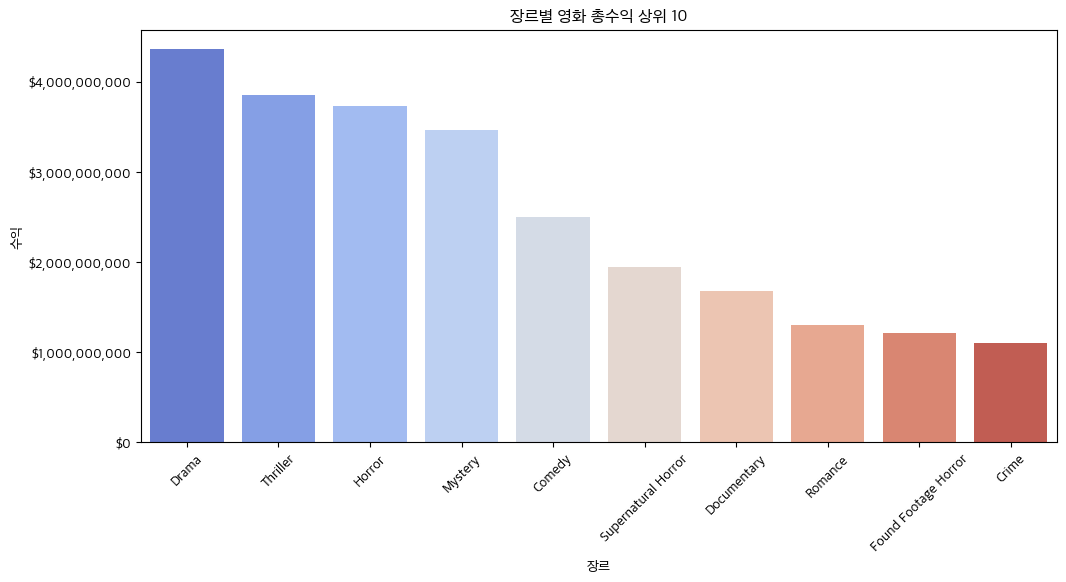

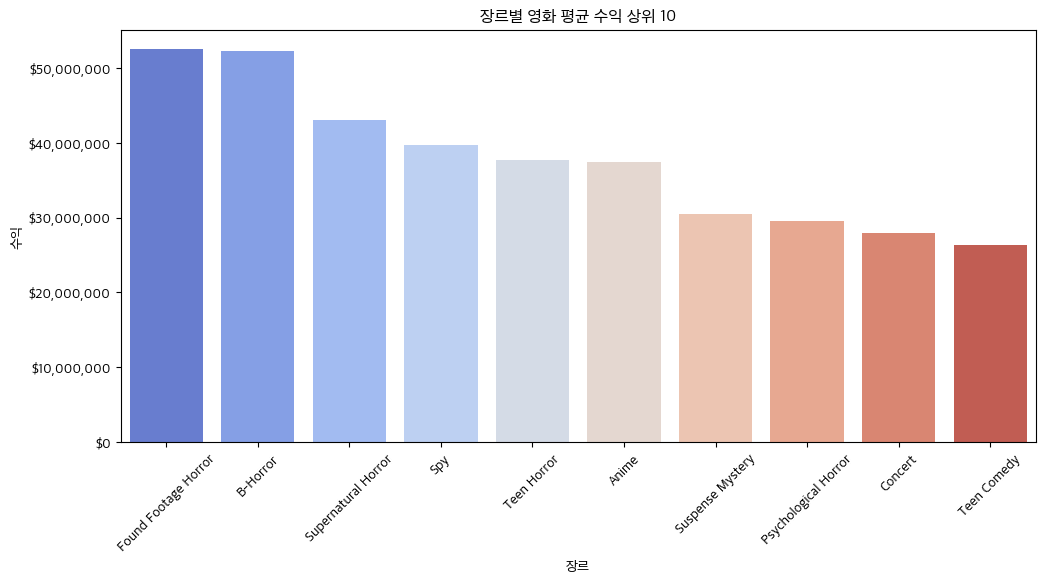

In [15]:
# 저예산 영화중 수익이 높은 영화의 장르
low_budget = df[df['budget'] <= 5e6]
get_mean_gross(low_budget, 'genres', xlabel='장르')

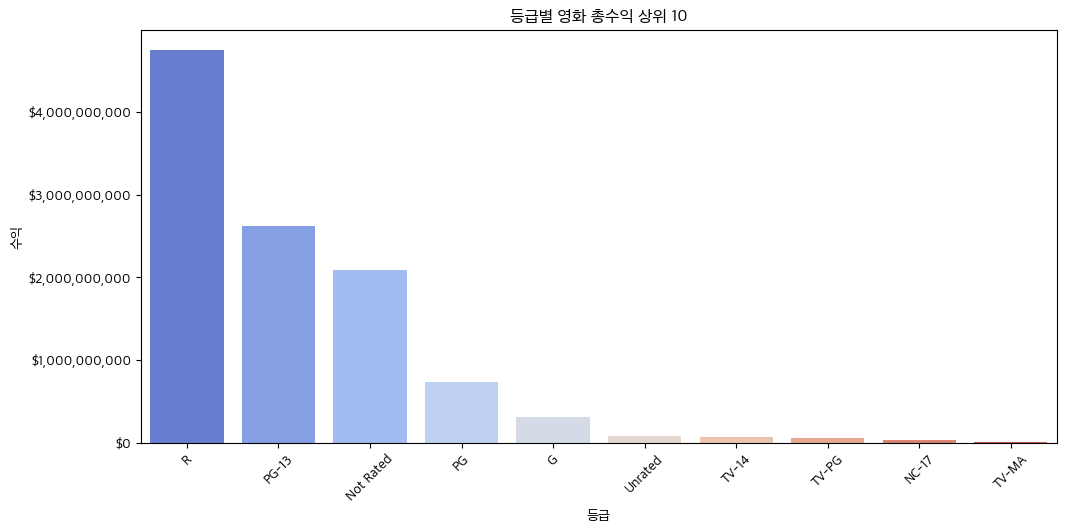

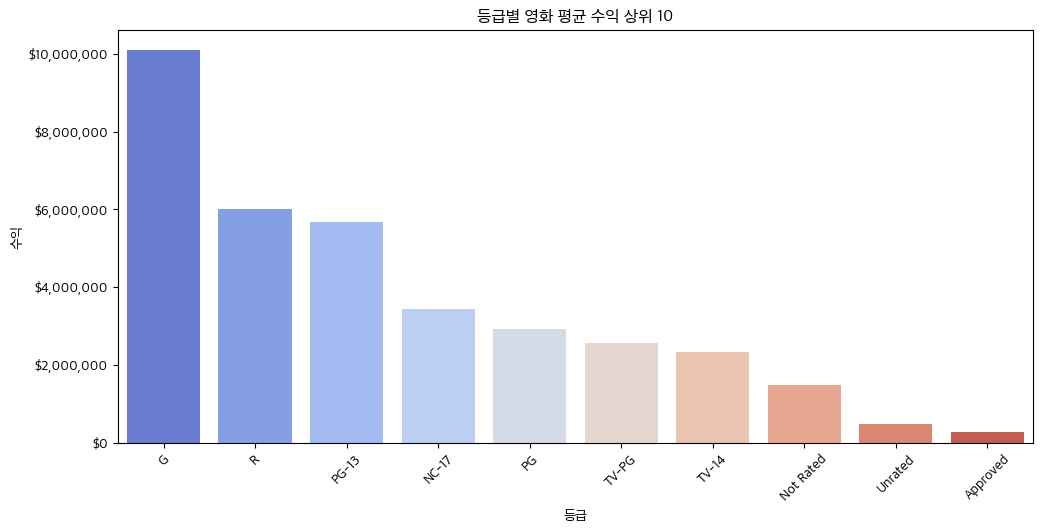

In [16]:
# 저예산 영화중 수익이 높은 영화의 장르
low_budget = df[df['budget'] <= 5e6]
get_mean_gross(low_budget, 'MPA', xlabel='등급')